In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
from collections import Counter
from operator import itemgetter

import corrnet

In [2]:
letter_manager = corrnet.LetterManager('data/letter_data.csv', date_col='Date',
                                       sender_col='Sender', addressee_col='Receiver',
                                       subject_col='Written for', provenance_col='Institution',
                                       type_col='Recommendation Type')

/Users/dbblumenthal/code/pycharm/corrnet/corrnet/letter_manager.py:42: UserWarning: Found and ignored 3 letters with invalid dates.
  warnings.warn(f'Found and ignored {len(idx_bad_dates)} letters with invalid dates.', UserWarning)


In [3]:
temporal_data, mean_pageranks = corrnet.temporal_analysis(letter_manager, earliest_date='1920-01-01', latest_date=None, step_width='6 m')

In [7]:
mean_pageranks['reversed'][:10]

[('Brieger Richard', 0.022666776308739957),
 ('Reifenberg Adolf', 0.017404805665895567),
 ('Ostwald Wolfgang', 0.01397470637339407),
 ('Nowak Rudolph', 0.01299541313062867),
 ('Felix Robert', 0.012986705996970398),
 ('Baller Robert Adolf', 0.01210442869594055),
 ('Arnhold Adolf', 0.010645598551032006),
 ('Eisler Alfred', 0.010642050879006042),
 ('Oppenheimer-Jahn Luise', 0.010459362316616483),
 ('Oppenheimer Adolf Josef', 0.010145078815539667)]

<AxesSubplot:xlabel='window_start', ylabel='pagerank_original_Einstein Albert'>

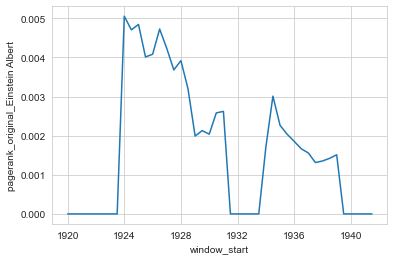

In [11]:
sns.lineplot(data=temporal_data, x='window_start', y='pagerank_original_Einstein Albert')

<AxesSubplot:xlabel='window_start', ylabel='transitivity'>

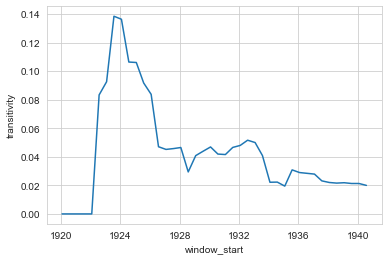

In [29]:
sns.lineplot(data=temporal_data, x='window_start', y='transitivity')

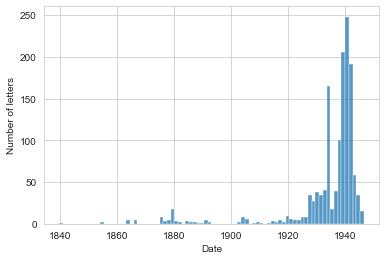

In [3]:
fig = letter_manager.plot_date_distribution(save_as='date_distr.pdf')

In [4]:
date_1 = pd.to_datetime('1920-01-10')
date_2 = pd.to_datetime('1925-01-10')
letter_manager._letter_data[(date_1 <= letter_manager._letter_data['Date']) & (letter_manager._letter_data['Date'] <= date_2)]

,index,Institution,Written for,Sender,Receiver,Date,Recommendation Type
109,112,American Friends Service Committee,Felix Robert,Zigarettenzeitung,Felix Robert,1920-06-15,X
110,113,Hebrew Uni Abgelehnt,Brieger Richard,Baumheier R.,Brieger Richard,1920-07-05,X
111,114,Hebrew Uni Abgelehnt,Baller Robert Adolf,Wiser,Baller Robert Adolf,1921-01-26,X
112,115,American Friends Service Committee,Oppenheimer Adolf Josef,"Blumenthal, Herz & Co",Oppenheimer Adolf Josef,1921-01-31,X
113,116,American Friends Service Committee,Weigl Karl,Strauss Richard,Weigl Karl,1921-03-12,X
114,117,American Friends Service Committee,Felix Robert,Kretschmer Ferdinand,Felix Robert,1921-09-15,X
115,118,Hebrew Uni Abgelehnt,Baller Robert Adolf,Pauer,Baller Robert Adolf,1921-11-26,X
116,119,Hebrew Uni Abgelehnt,Baller Robert Adolf,Romich,Baller Robert Adolf,1921-12-03,X
117,120,Arnholds,Arnhold Georg,Teuffel,Württembergiscche Regierung,1922-02-23,Y
118,121,American Friends Service Committee,Mauthner Ernst von,Peham Hofrat,Mauthner Ernst von,1922-10-31,X


In [25]:
g = letter_manager.to_digraph(subjects_as_nodes=True, earliest_date='1933-01-01', latest_date='1945-12-31')

In [27]:
properties = corrnet.compute_network_properties(g)

In [35]:
set(g.edges())

{('Baron Hans', 'Baron Hans'),
 ('Mathisson Myron', 'Hadamard Jacques'),
 ('Rogers Mary M.', 'Duggan Stephan'),
 ('Miller Alphonse B.', 'Epstein Hertha'),
 ('Fliess Fritz', 'Melchior M. V.'),
 ('Weigert E.', 'Brieger Richard'),
 ('Schauffler Marjorie Page', 'Fuson Nelson'),
 ('Anselmino', 'Magnes Judah Leon'),
 ('Ollendorff Käthe', 'Kaliski'),
 ('Elkan Dorothea', 'Reich'),
 ('Rotary International', 'Rotary USA'),
 ('Polotsky Hans Jakob', 'Levy Hans'),
 ('Brieger Richard', 'Wolff P.'),
 ('Planer Friedrich', 'RAC Frank'),
 ('Flexner Jennie M.', 'Clancy Louise'),
 ('Crawford C.L.', 'Hambly Hanstein Kathleen'),
 ('Deutsches Familien-Kaufhaus', 'Oppenheimer-Jahn Luise'),
 ('Krauss Hertha', 'Koehler Wolfgang'),
 ('Opet Otto', 'Fuß geb. Opet Meta'),
 ('Weigl Karl', 'Grolle Johan'),
 ('Baller Robert Adolf', 'Zionistisches Landeskomitee für Österreich'),
 ('Weissenberg Walter', 'Timbres Rebecca'),
 ('Eisenklamm Dorian', 'Torczyner Harry'),
 ('McKinney Camilla', 'Hambly Hanstein Kathleen'),
 ('B

In [7]:
pageranks['reversed']['pageranks']['Einstein Albert']

0.0020231087727824513

In [9]:
pageranks['reversed']['top_10']

[('Fliess Fritz', 0.021572395836974307),
 ('Brieger Richard', 0.018512921919195003),
 ('Schönfeld Bruno', 0.016667742278061528),
 ('Vaszonyi Andrew', 0.014878201809528261),
 ('Löwenberg Ernst', 0.01306521186315467),
 ('Rado Tibor', 0.012948321675663281),
 ('Schwabach Paul Julius von', 0.011788305043193786),
 ('Wollweber Trude', 0.011725746057648789),
 ('Hambly Hanstein Kathleen', 0.010755680130025687),
 ('Barschak Erna', 0.01069777364337356)]

In [8]:
h = nx.DiGraph()
h.add_edge(0, 1, provenances=set([1]))
h[0][1]['provenances'].add(2)
h[0][1]

{'provenances': {1, 2}}

In [9]:
nodes = [node for node in g.nodes() if 'Sender' in g.nodes[node]['roles']]

AttributeError: 'DiGraph' object has no attribute 'total_'

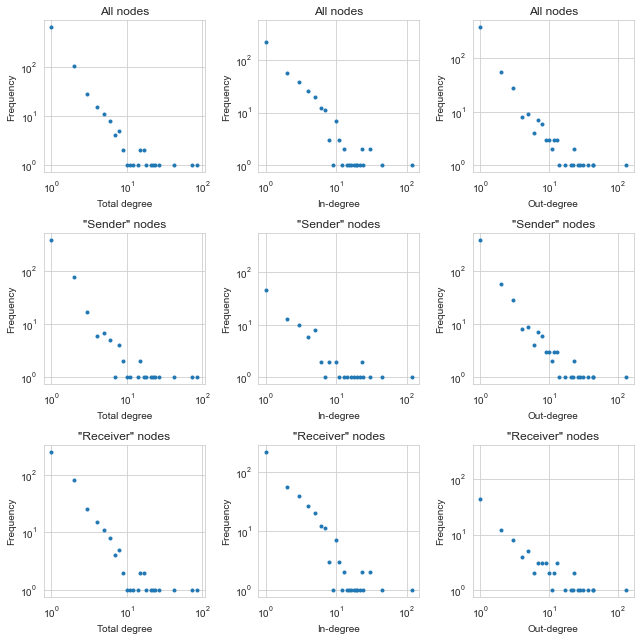

In [8]:
plot_degree_distributions(g, use_weights=True, save_as='degrees.pdf')